
<p><font size="5">  MOOC: Understanding queues</font></p>
<p><font size="5">  Python Lab
</p></br>
<p><font size="5">  Week II: M/M/1 queue simulation </p></br>

------------------------

#### Qizz before the lab https://courses.edx.org/courses/course-v1:IMTx+CS101+1T2018/courseware/bbad404e8061479cb8f7ed82bb582462/dc5314ba55034aeaae10950ee50b50a7/?child=last

In this lab, we are going to simulate the evolution of the number of customers in a M/M/1 queue.
Let $\lambda$ and $\mu$ represent the arrival and departure rates. We simulate the following events: arrival of a new client in the system, or departure of a client from the system. Additionally, we record the value of the number of customers in the system at these instants. 



**1)** We assume that the system is not empty. For $\lambda=4$ and $\mu=5$, what is the probability $Pa$ that the next event is an arrival?

In [2]:
%matplotlib inline              
from pylab import *          

lambda_ = 4
mu      = 5

###################
# Write a function that computes the probability Pa that the next event
# is an arrival (when the system is not empty)
def Pa(lambda_,mu):
    return (lambda_/(lambda_+mu))
###################
V1 = Pa(lambda_,mu)

**2)** Assume that the system is not empty. The time before the next event (departure or arrival) follows an exponential distribution. What is the rate of this exponential distribution? 

In [5]:
###################
# Supply the rate of the exponential distribution 
# that represents the time until the next event (departure or arrival)
# if the system is not empty
def Rate(lambda_,mu):
    return(lambda_ + mu)
###################
V2 = Rate(lambda_,mu)

**3)** The implementation of the function **generate\_MM1(lambda_=4, mu=5, N0 = 5, Tmax=200)** with entries 

> - lambda, mu: arrival and departure rates

> - N0: initial number of customers in the system

> - Tmax: time interval over which the evolution of the queue is simulated

and outputs

> - T: vector of instants of events (arrivals or departures) over [0,Tmax]

> - N: vector of the number of customers in the system at instants in T 

is given below. Execute this code to plot the evolution the number of clients in the system against time.  


In [13]:
def generate_MM1(lambda_=4,mu=5,N0=5,Tmax=200):
    """
    function generate_MM1(N0 = 5,Tmax=200)
    generates an MM1 file
    INPUTS
    ------
    lambda, mu: arrival and departure rates
    N0:         initial state of the system (default = 5)
    Tmax:       duration of the observation (default = 200)
    OUTPUTS
    -------
    T:          list of time of events (arrivals or departures) over [0,T]
    N:          list of system states (at T(t): N->N+1 or N->N-1)
    """
    seed(20) 
    tau   = 0       # initial instant
    T     = [0]     # list of instants of events
    N     = [N0]    # initial state of the system, list of state evolutions

    while T[-1]<Tmax:
        if N[-1]==0:
            tau   = -1./lambda_*log(rand()) # inter-event time when N(t)=0
            event = 1   # arrival
        else:
            tau   = -1./Rate(lambda_,mu)*log(rand()) # inter-event time when N(t)>0
            event = 2*(rand()<Pa(lambda_,mu))-1 
            # +1 for an arrival (with probability Pa), -1 for a departure
        N = N + [N[-1]+event]  
        T = T + [T[-1]+tau]

    T = T[:-1] # event after Tmax is discarded
    N = N[:-1]
    return T,N

Text(0,0.5,'Number of customers')

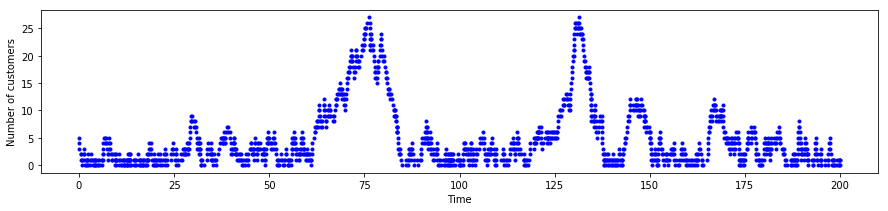

In [14]:
# Plotting the number of clients in the system
T,N = generate_MM1()
rcParams['figure.figsize'] = [15,3]
plot(T,N,'.b')
xlabel('Time')
ylabel('Number of customers')

**4)** Letting now $\lambda=4$ and $\mu=3$, what do you notice when running the function generate_MM1? What is the value of the number of customers at $Tmax=200$?

Text(0,0.5,'Number of customers')

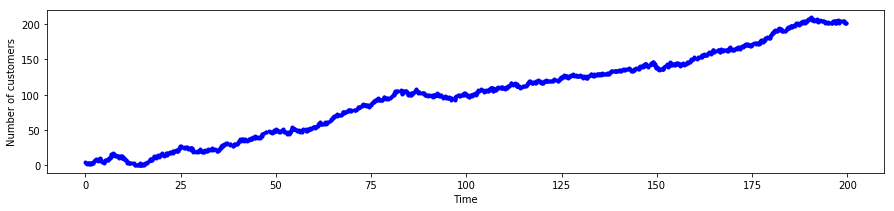

In [15]:
T,N = generate_MM1(lambda_=4,mu=3)
rcParams['figure.figsize'] = [15,3]
plot(T,N,'.b')
xlabel('Time')
ylabel('Number of customers')

In [16]:
#####################
# Supply the number of customers at Tmax
n = 200
print('At Tmax, N={}'.format(n))
#####################
V3 = n

At Tmax, N=200


# Your answers for the exercise

In [17]:
print("---------------------------\n"
      +"RESULTS SUPPLIED FOR LAB 2:\n"
      +"---------------------------")
results = ("V"+str(k) for k in range(1,4))
for x in results:
    try:
        print(x+" = {0:.2f}".format(eval(x)))
    except:
        print(x+": variable is undefined") 

---------------------------
RESULTS SUPPLIED FOR LAB 2:
---------------------------
V1 = 0.44
V2 = 9.00
V3 = 200.00
